In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os

DATA_DIR = '/content/drive/My Drive/Example codes/Images'
print(os.listdir(DATA_DIR))

['00000']


In [5]:
print(os.listdir(DATA_DIR+'/00000')[:10])

['img00000001.png', 'img00000009.png', 'img00000002.png', 'img00000000.png', 'img00000005.png', 'img00000007.png', 'img00000010.png', 'img00000003.png', 'img00000006.png', 'img00000008.png']


In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [7]:
imgpath = DATA_DIR+'/00000/img00000048.png'
img = cv2.imread(imgpath,0)

([], [])

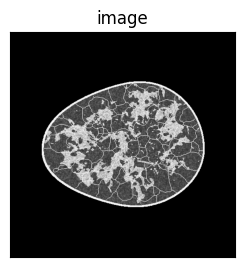

In [8]:
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('image')
plt.xticks([])
plt.yticks([])

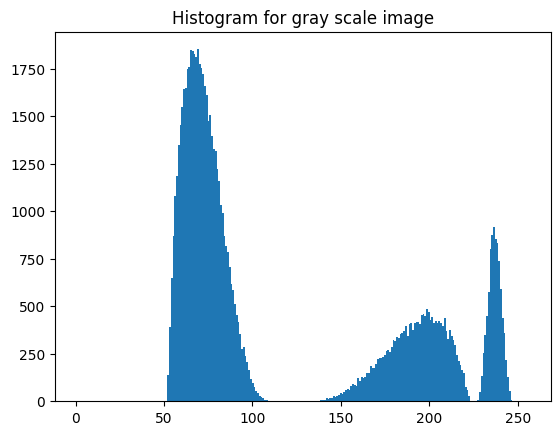

In [9]:
dst = cv2.calcHist(img, [0], None, [256], [0,256])

plt.hist(img.ravel(),256,[1,256])
plt.title('Histogram for gray scale image')
plt.show()

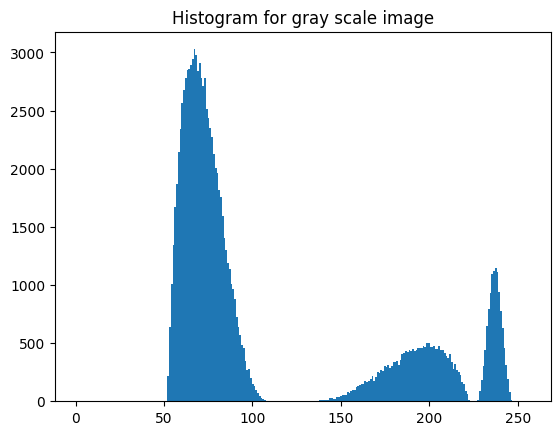

In [10]:
imgpath = DATA_DIR+'/00000/img00000049.png'
img = cv2.imread(imgpath,0)
dst = cv2.calcHist(img, [0], None, [256], [0,256])

plt.hist(img.ravel(),256,[1,256])
plt.title('Histogram for gray scale image')
plt.show()

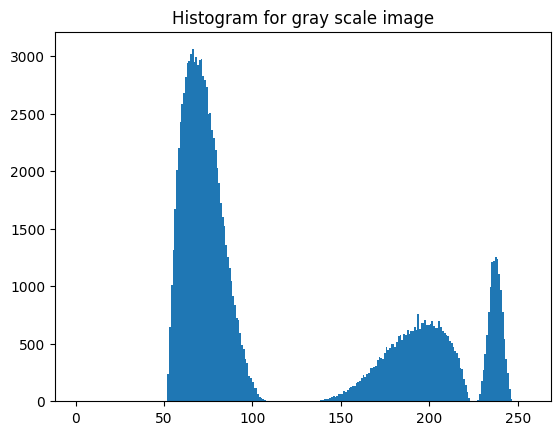

In [11]:
imgpath = DATA_DIR+'/00000/img00000061.png'
img = cv2.imread(imgpath,0)
dst = cv2.calcHist(img, [0], None, [256], [0,256])

plt.hist(img.ravel(),256,[1,256])
plt.title('Histogram for gray scale image')
plt.savefig('grayscale_image.png')
plt.show()

In [12]:
from PIL import Image
import numpy as np
image_files = os.listdir(DATA_DIR+'/00000')
image_arrays = []
for file_path in image_files:
    image = Image.open(DATA_DIR+'/00000/' + str(file_path))  
    image_array = np.array(image)  
    image_arrays.append(image_array)
image_dataset = np.stack(image_arrays, axis=0)
print("Shape of image dataset array:", image_dataset.shape)


Shape of image dataset array: (995, 512, 512)


In [13]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
shape_3d = image_dataset.shape
image_dataset = np.reshape(image_dataset, (shape_3d[0], shape_3d[1] * shape_3d[2]))  

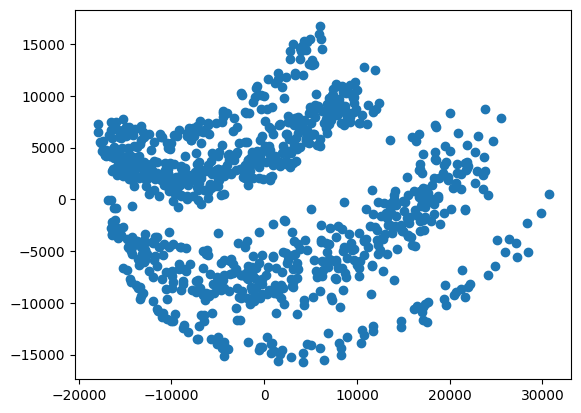

In [14]:
n_components = 2  
pca = PCA(n_components=n_components)
image_features = pca.fit_transform(image_dataset)
if n_components == 2:
    # 2D plot
    plt.scatter(image_features[:, 0], image_features[:, 1])
elif n_components == 3:
    # 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(image_features[:, 0], image_features[:, 1], image_features[:, 2])
else:
    print(f"n_components = {n_components} is not supported for visualization.")
plt.savefig('2D_distribution_image.png')
plt.show()

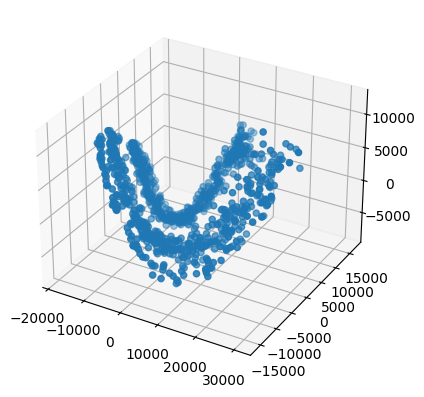

In [15]:
n_components = 3
pca = PCA(n_components=n_components)
image_features = pca.fit_transform(image_dataset)
if n_components == 2:
    # 2D plot
    plt.scatter(image_features[:, 0], image_features[:, 1])
elif n_components == 3:
    # 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(image_features[:, 0], image_features[:, 1], image_features[:, 2])
else:
    print(f"n_components = {n_components} is not supported for visualization.")
plt.savefig('2D_distribution_image.png')
plt.show()